# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

C:\Users\Samantha\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Samantha\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034L,)
test label shape: (677L,)
dev label shape: (676L,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [154]:
def P1(num_examples=5):
### STUDENT START ###
    line="-"

    for i in range(num_examples):
        print "Example Number:", i+1
        print "Label: ",newsgroups_train.target_names[train_labels[i]],"\n", "Text: ",train_data[i]
        print "\n","\n",line*50,"\n","\n"
    
### STUDENT END ###
P1()

Example Number: 1
Label:  comp.graphics 
Text:  Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


-------------------------------------------------- 


Example Number: 2
Label:  talk.religion.misc 
Text:  

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 19

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [274]:
def P2():
### STUDENT START ###
    #Q2A
    vec = CountVectorizer()
    p2a_features = vec.fit_transform(train_data)
    nz=[]

    for i in range(p2a_features.shape[0]):
        nz.append(p2a_features.getrow(i).nnz)

    print "Question 2A"
    print "Vocabulary Size:", p2a_features.shape[1]    
    print "Average number of non-zero features per example:",round(np.mean(nz),2)
    print "Percent of non-zero features:", 100 * (round(float(p2a_features.nnz) / (float(p2a_features.shape[0]) * float(p2a_features.shape[1])),4)),"%"
    print "\n"

    #Q2B
    features = vec.get_feature_names()
    features.sort()

    print "Question 2B"
    print "First feature string:", features[0]
    print "Last Feature String:", features[len(features)-1]
    print "\n"

    #Q2C
    voc = ["atheism", "graphics", "space", "religion"]
    vec2C = CountVectorizer(vocabulary=voc)
    p2c_features = vec2C.fit_transform(train_data)

    nz2c = []

    for i in range(p2c_features.shape[0]):
        nz2c.append(p2c_features.getrow(i).nnz)

    print "Question 2C"
    print "Average number of non-zero features per example:",round(np.mean(nz2c),2)
    print "\n"

    #Q2D
    vec2d = CountVectorizer(analyzer='char_wb', ngram_range=(2,3))
    p2d_features = vec2d.fit_transform(train_data)
    vec2d_2 = CountVectorizer(analyzer='char', ngram_range=(2,3))
    p2d_2_features = vec2d_2.fit_transform(train_data)

    print "Question 2D"
    print "Vocabulary Size (without crossing word boundaries):", p2d_features.shape[1]    
    print "Vocabulary Size (with crossing word boundaries):", p2d_2_features.shape[1]    
    print "\n"

    #Q2E
    vec2e = CountVectorizer(min_df=10)
    p2e_features = vec2e.fit_transform(train_data)

    print "Question 2E"
    print "Vocabulary Size:", p2e_features.shape[1]
    print"\n"

    #Q2F

    vec2f = CountVectorizer()
    
    #obtain vocab list for train data
    p2f_train_features = vec2f.fit_transform(train_data)
    train_voc = vec2f.get_feature_names()
    
    #obtain vocab list for dev data
    p2f_dev_features = vec2f.fit_transform(dev_data)
    dev_voc = vec2f.get_feature_names()
    
    #compute percent of words in dev data missing from train data
    missing_pct = round(len(set(dev_voc) - set(train_voc)) / float(len(dev_voc)),3)
    
    print "Question 2F"
    print "Fraction of dev vocab missing from train vocab:", missing_pct

### STUDENT END ###
P2()

Question 2A
Vocabulary Size: 26879
Average number of non-zero features per example: 96.71
Percent of non-zero features: 0.36 %


Question 2B
First feature string: 00
Last Feature String: zyxel


Question 2C
Average number of non-zero features per example: 0.27


Question 2D
Vocabulary Size (without crossing word boundaries): 28954
Vocabulary Size (with crossing word boundaries): 35478


Question 2E
Vocabulary Size: 3064


Question 2F
Fraction of dev vocab missing from train vocab: 0.248


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [173]:
def P3():
### STUDENT START ###
    #Use the standard CountVectorizer to vectorize the text
    vec3 = CountVectorizer()
    vec_train_data = vec3.fit_transform(train_data)
    vec_dev_data = vec3.transform(dev_data)
      
#   Run KNN through GridSearchCV to identify an optimal K value
#   Then compute the F1 score of the predictions
    neighbors = {'n_neighbors': range(1,1000)}
    p3k = GridSearchCV(KNeighborsClassifier(),neighbors,scoring='f1_micro')
    p3k.fit(vec_train_data, train_labels)
    p3k_preds = p3k.predict(vec_dev_data)
    print "Optimal K:", p3k.best_params_
    print "KNN F1:", metrics.f1_score(dev_labels, p3k_preds, average='micro')
    print "\n"

    # Run MultinomialNB through GridSearchCV to identify the optimal alpha value
    alphas = {'alpha': [0.0001,0.001,0.01,0.1,0.5,1.0,2.0,10.0,100.0,1000.0,]}
    p3nb = GridSearchCV(MultinomialNB(), alphas)
    p3nb.fit(vec_train_data, train_labels)
    p3nb_preds = p3nb.predict(vec_dev_data)
    p3nb_accuracy = np.mean(p3nb_preds==dev_labels)
    print "Optimal Alpha:", p3nb.best_params_
    print "MultiNomialNB Accuracy:", p3nb_accuracy
    print "\n"

    # Run Logisitic Regression through GridSearchCV to identify the optimal regularization strength
    strengths = {'C': [0.1,0.2,0.3,0.4,0.5,1.0,5.0,10.0]}
    p3reg = GridSearchCV(LogisticRegression(), strengths, scoring='f1_micro')
    p3reg.fit(vec_train_data, train_labels)
    p3reg_preds = p3reg.predict(vec_dev_data)
    print "Optimal Regularization Strength:", p3reg.best_params_
    print "Regression Accuracy:", np.mean(p3reg_preds==dev_labels)
    print "\n"
    
#     ##3C
#     for i in enumerate(strengths["C"]):
#         logreg = LogisticRegression(C=i[1])
#         logreg.fit(vec_train_data, train_labels)
#         print "Regularization Strengh:", i[1]
#         print "Sum of Squared Weights:"
#         for j in set(train_labels):
#             print newsgroups_train.target_names[train_labels[j]], ":", sum((logreg.coef_[j])**2)
#     ### STUDENT END ###
    
P3()

Optimal K: {'n_neighbors': 151}
KNN F1: 0.442307692308


Optimal Alpha: {'alpha': 0.01}
MultiNomialNB Accuracy: 0.779585798817


Optimal Regularization Strength: {'C': 0.2}
Regression Accuracy: 0.713017751479




### 3A
##### KNN doesn't work well for this problem because it is non-parametric and must compute the distance between ALL other features. Additionally, KNN weighs each feature equally. For example, the word "hello" carries the same weight as the word "astronaut". This can be problematic for text classification because obviously specific words carry much heavier weights. With NB, each feature's weight is independent of one another. 

### 3B
##### NB is a generative model and will include each feature weight into the model. In text classification, this means that if somebody mentions two words that are heavily-weighted and highly-correlated, the model will include both weights. In Logisitic, Regression, we essentially do the opposite. It will account for this correlation and split the weight amongst the correlated features.

### 3C
##### The value for C is an inverse of the regularization strength. This means that a lower value will regularize the weights more than a higher value. In the output below, as C increases, the weights also increase. 

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

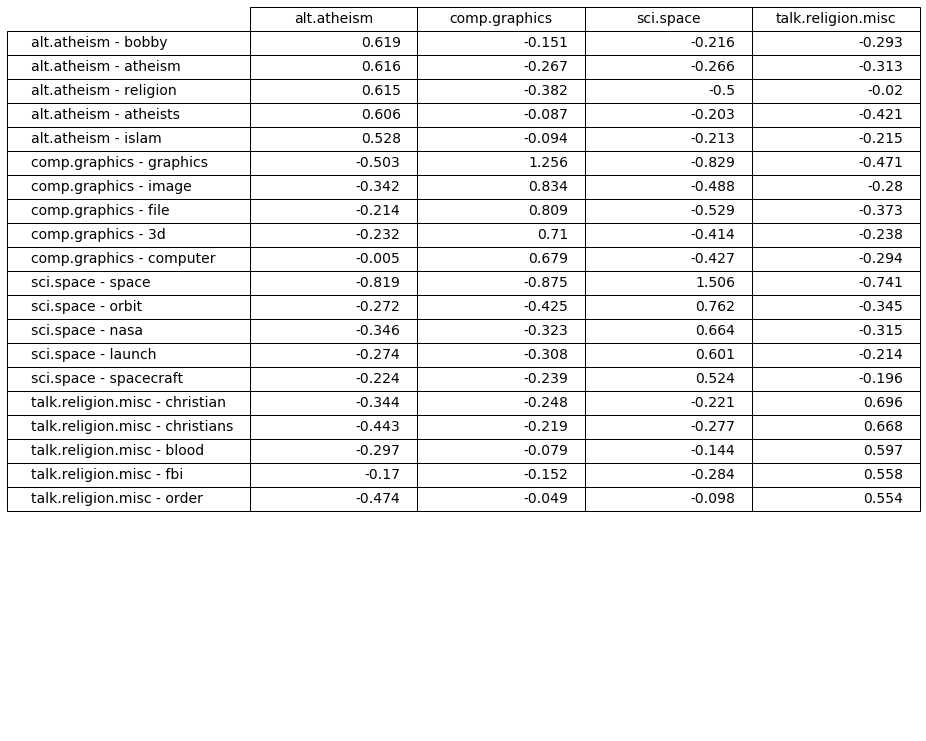

In [156]:
def P4():
    ### STUDENT START ###
    vec4 = CountVectorizer()
    vec_train = vec4.fit_transform(train_data).toarray()
    vec_dev = vec4.transform(dev_data).toarray()

    # Due to the optimal C value in the prior question, I've set C=0.2
    p4Reg = LogisticRegression(C=0.2)
    p4Reg.fit(vec_train, train_labels)
    p4preds = p4Reg.predict(vec_dev)

    # Define the number of terms we want to pull for each label
    num_terms = 5

    # Pull the coefficient values for the regression
    p4coef = p4Reg.coef_

    # set a few variables
    tmp_weights=[]
    terms=[]
    group = []
    vals = []

    # loop through the coefficient values
    for i in range(len(p4coef)):
        weights = list(p4coef[i])

        # Reverse sort the coefficient weights and pull out the top values
        max_coef_weights = sorted(weights, reverse=True)[:num_terms]

        # Append the label name to a list
        group.append(newsgroups_train.target_names[i])

        # Within each label group, loop through the top coefficients
        for j in max_coef_weights:
            coef = weights.index(j)

            # Create a list of the label name and the cofficient name
            terms.append(group[i] + " - " + vec4.get_feature_names()[coef])

            # Within each coefficient, pull the weights for the other labels
            for k in range(len(p4coef)):
                other_weights = list(p4coef[k])

                #Create a list of the weights (rounded to 3 decimal places)
                tmp_weights.append(round(other_weights[coef],3))

            # append the list of weights to a list of weight lists
            vals.append(tmp_weights)

            # before moving to the next coefficient, reset the weights list
            tmp_weights=[]

    # I decided to use matplotlib to create my table of coeffient weights
    # To do this, I turned off all of the actual plot lines
    ax = plt.subplot(frame_on=False)

    # Hide axes
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False)
    table = plt.table(cellText=vals,
              colLabels=group,
              rowLabels=terms,
              loc='top'
             )
    # increase font size
    table.set_fontsize(14)
    table.scale(2,2)


    ### STUDENT END ###
P4()

F1 Score: 0.594674556213


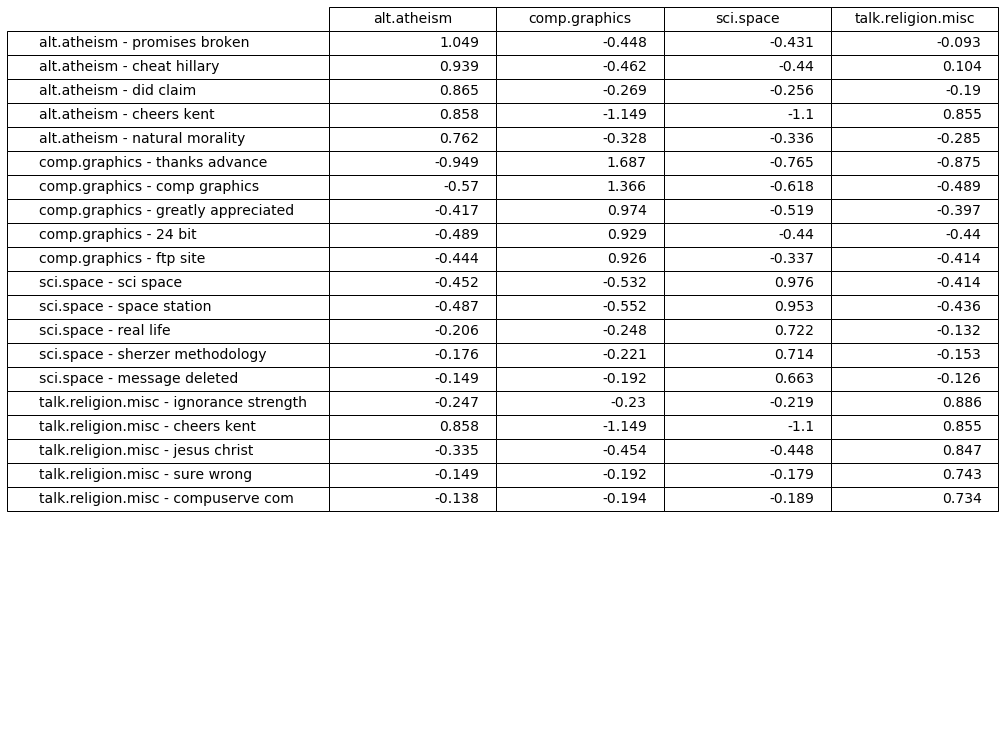

In [169]:
def P4_2():

    # I did all of the same things here, except I set the Count Vectorizer to pull word bigrams
    # And I also set the stop_words to English to avoid having bigrams with low value words
    vec4_2 = CountVectorizer(stop_words='english', analyzer='word',ngram_range=(2,2))
    vec_train_2 = vec4_2.fit_transform(train_data).toarray()
    vec_dev_2 = vec4_2.transform(dev_data).toarray()
    
    p4Reg_2 = LogisticRegression()
    p4Reg_2.fit(vec_train_2, train_labels)
    p4preds_2 = p4Reg_2.predict(vec_dev_2)

    print "F1 Score:", metrics.f1_score(dev_labels, p4preds_2, average='micro')
    num_terms = 5
    p4coef_2 = p4Reg_2.coef_

    tmp_weights=[]
    terms=[]
    group = []
    vals = []
    for i in range(len(p4coef_2)):
        weights = list(p4coef_2[i])
        max_coef_weights = sorted(weights, reverse=True)[:num_terms]
        group.append(newsgroups_train.target_names[i])

        for j in max_coef_weights:
            coef = weights.index(j)
            terms.append(group[i] + " - " + vec4_2.get_feature_names()[coef])

            for k in range(len(p4coef_2)):
                other_weights = list(p4coef_2[k])
                tmp_weights.append(round(other_weights[coef],3))

            vals.append(tmp_weights)
            tmp_weights=[]


    ax_2 = plt.subplot(frame_on=False)

    # Hide axes
    ax_2.xaxis.set_visible(False) 
    ax_2.yaxis.set_visible(False)
    table_2 = plt.table(cellText=vals,
              colLabels=group,
              rowLabels=terms,
              loc='top'
             )
    table_2.set_fontsize(14)
    table_2.scale(2,2)
P4_2()

ANSWER:
- In the first table, the only features that were surprising was that "fbi" was a  top feature for "Religion" and "bobby" was a top feature for "Atheism".
- In the second table, things got a bit more interesting. "Atheism" had some interesting features. "Cheat hillary" seemed odd to be a feature that had a coefficient value of 0.939. "Cheers kent" also had a high value for both "Atheism" and "Religion".
- Space and Graphics were both relatively straightforward. I didn't see much there that was unexpected except that "thanks advance" had one of the highest coefficient weights of all labels, and it doesn't seem to be a term I'd associate with only "graphics". It could be that graphics records were the only ones where people were asking for help and were ending their request with "Thanks in advance".
- Lastly, it is interesting that with single terms, the weights are pretty neutral for each term, but with the bigrams, we see phrases with much more extreme coefficient values. 

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [184]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    # remove special characters and lowercase all text
    s = re.sub('[^a-zA-Z]', ' ', s)
    
    # remove short words that provide little meaning
    sw = re.compile(r'\W*\b\w{1,3}\b')
    s = sw.sub('',s)
    
    # replace long numeric strings with x
    s = re.sub('[0-9]{4}', 'x',s)
    
    # lowercasing the text seems like it would be a good idea, but it actually decreases accuracy.
    # I assume that this is because we lose recognition of proper nouns
    #s = s.lower()
    
    return s
### STUDENT END ###

def P5():
### STUDENT START ###

    # vectorize data with better processor
    bp_vec = CountVectorizer(preprocessor=better_preprocessor)
    bp_train_data = bp_vec.fit_transform(train_data)
    bp_dev_data = bp_vec.transform(dev_data)
    
    # vectorize data with empty processor
    ep_vec = CountVectorizer(preprocessor=empty_preprocessor)
    ep_train_data = ep_vec.fit_transform(train_data)
    ep_dev_data = ep_vec.transform(dev_data)
        
    p5Reg = LogisticRegression()
    p5Reg.fit(ep_train_data, train_labels)
    ep_p5preds = p5Reg.predict(ep_dev_data)  
        
    p5Reg.fit(bp_train_data, train_labels)
    bp_p5preds = p5Reg.predict(bp_dev_data)  
        
    print "Empty Processor F1:", metrics.f1_score(dev_labels, ep_p5preds, average='micro')
    print "Better Processor F1:", metrics.f1_score(dev_labels, bp_p5preds, average='micro')
    print "Empty Processor Vocab Size:", ep_train_data.shape[1]
    print "Better Processor Vocab Size:", bp_train_data.shape[1]
    print "Vocab reduced by:", ep_train_data.shape[1] - bp_train_data.shape[1]
### STUDENT END ###
P5()

Empty Processor F1: 0.707100591716
Better Processor F1: 0.727810650888
Empty Processor Vocab Size: 33291
Better Processor Vocab Size: 27719
Vocab reduced by: 5572


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

Number of features with at least 1 non-zero weight using L1: 1050
Number of non-zero weights with L1 regularization: 1743


Number of features with at least 1 non-zero weight using L2: 26879
Number of non-zero weights with L2 regularization: 107516


Difference in features with at least 1 non-zero weight: 25829
Difference in non-zero weights: 105773


Retraining model with adjusted C-values & pruned vocabularies
C: 0.01 Vocab Length: 18 F1 Score: 0.486686390533
C: 0.06 Vocab Length: 139 F1 Score: 0.62426035503
C: 0.11 Vocab Length: 223 F1 Score: 0.686390532544
C: 0.16 Vocab Length: 311 F1 Score: 0.687869822485
C: 0.21 Vocab Length: 385 F1 Score: 0.698224852071
C: 0.26 Vocab Length: 445 F1 Score: 0.689349112426
C: 0.31 Vocab Length: 534 F1 Score: 0.677514792899
C: 0.36 Vocab Length: 588 F1 Score: 0.690828402367
C: 0.41 Vocab Length: 653 F1 Score: 0.680473372781
C: 0.46 Vocab Length: 798 F1 Score: 0.684911242604
C: 0.51 Vocab Length: 758 F1 Score: 0.674556213018
C: 0.56 Vocab Length: 765

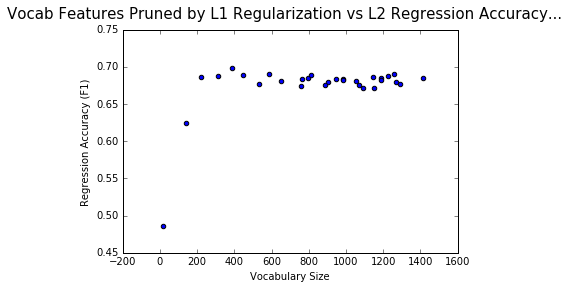

In [145]:
def P6():
        # Keep this random seed here to make comparison easier.
    np.random.seed(0)

        ### STUDENT START ###
    vec6 = CountVectorizer()
    vec_train_data = vec6.fit_transform(train_data)
    vec_dev_data = vec6.transform(dev_data)

    p6_reg_L1 = LogisticRegression(penalty="l1")
    p6_reg_L1.fit(vec_train_data, train_labels)

    p6_reg_L2 = LogisticRegression(penalty="l2")
    p6_reg_L2.fit(vec_train_data, train_labels)

    l1_coef = p6_reg_L1.coef_
    l2_coef = p6_reg_L2.coef_

    L1_nz_features = len(np.where(l1_coef.sum(axis=0)!=0)[0])
    L2_nz_features = len(np.where(l2_coef.sum(axis=0)!=0)[0])

    L1_nz_weights = np.sum(l1_coef.ravel() != 0)
    L2_nz_weights = np.sum(l2_coef.ravel() != 0)

    #Keep in mind that these non-zero values are counted across all 4 classifications
    print "Number of features with at least 1 non-zero weight using L1:", L1_nz_features
    print "Number of non-zero weights with L1 regularization:", L1_nz_weights
    print "\n"
    print "Number of features with at least 1 non-zero weight using L2:", L2_nz_features
    print "Number of non-zero weights with L2 regularization:", L2_nz_weights
    print "\n"
    print "Difference in features with at least 1 non-zero weight:", L2_nz_features - L1_nz_features
    print "Difference in non-zero weights:", L2_nz_weights - L1_nz_weights
    print "\n"



    ### Retrain regression models with adjusted C-values & pruned vocabularies
    print "Retraining model with adjusted C-values & pruned vocabularies..."
    vocab_sizes = []
    f1_scores = []

    for i in range(30):

        # increment the C value with each iteration
        c_val = 0.01 + 0.05*i

        # execute the L1 regression with each new C value to adjust the weights
        # these adjusted weights are what will allow us to re-identify the useful features
        p6_reg_L1_nz = LogisticRegression(penalty="l1",tol=0.01,C=c_val)
        p6_reg_L1_nz.fit(vec_train_data, train_labels)
        nz_L1_coef = p6_reg_L1_nz.coef_

        # this will find which feature columns in the L1_coef output do NOT sum up to 0
        nz_features = np.where(nz_L1_coef.sum(axis=0)!=0)[0]
        
        ## identify the vocabulary terms with non-zero value weights
        vocab = []      
        for j in enumerate(nz_features):
            vocab.append(vec6.get_feature_names()[j[1]])

        ## re-vectorize the train & dev data with the pruned vocabulary
        vec6_nz = CountVectorizer(vocabulary=vocab)
        nz_train = vec6_nz.fit_transform(train_data)
        nz_dev = vec6_nz.transform(dev_data)

        # run regression with L2 regularization and adjusted vocab and C value
        # this will tell us how much the adjusted vocabulary impacted the score with an L2 regression
        p6_reg_L2_nz = LogisticRegression(tol=0.01, C=c_val)
        p6_reg_L2_nz.fit(nz_train, train_labels)
        nz_L2_preds = p6_reg_L2_nz.predict(nz_dev)
        f1 = metrics.f1_score(dev_labels, nz_L2_preds, average="micro")

        vocab_sizes.append(len(vocab))
        f1_scores.append(f1)        
        print "C:",c_val, "Vocab Length:", len(vocab), "F1 Score:", f1

    fig = plt.figure()
    plt.scatter(vocab_sizes, f1_scores)
    fig.suptitle('Vocab Features Pruned by L1 Regularization vs L2 Regression Accuracy', fontsize=15)
    plt.xlabel('Vocabulary Size')
    plt.ylabel('Regression Accuracy (F1)')


### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [275]:
def P7(num_max_docs):
    ### STUDENT START ###

    # Use Tf-idf vectorizer to vectorize data using Term Frequency - Inverse Document Frequency
    vec7 = TfidfVectorizer()
    tf_train = vec7.fit_transform(train_data)
    tf_dev = vec7.transform(dev_data)

    # Run logistic regression with C=100
    p7_reg = LogisticRegression(C=100)
    p7_reg.fit(tf_train, train_labels)
    p7_preds = p7_reg.predict(tf_dev)

    # print the model's accuracy
    p7_accuracy = np.mean(p7_preds==dev_labels)
    print "Regression Accuracy:", p7_accuracy, "\n"

    # create a list of each document's prediction probability by classification
    probs = p7_reg.predict_proba(tf_dev)

    # loop through prediction probabilities and create a list of calculated R ratios
    # R ratio: max prediction prob / prediction prob of actual label
    r_ratio = []
    for i in range(len(probs)):
        max_pred = max(probs[i])
        actual_pred = probs[i][dev_labels[i]]
        r_ratio.append(max_pred / actual_pred)

    # pull the top R values and store them in a list
    max_R = sorted(r_ratio, reverse=True)[:num_max_docs]  

    #pull the details of the documents with the highest R ratios
    for j in range(num_max_docs):
        max_idx = r_ratio.index(max_R[j])
        print "Example Number:", j+1
        print "Predicted Category:",newsgroups_train.target_names[p7_preds[max_idx]]
        print "Actual Category:",newsgroups_train.target_names[dev_labels[max_idx]]
        print "R Ratio:", r_ratio[max_idx]
        print "Index in dev_data:", max_idx
        print "\n"
        print dev_data[max_idx]
        print "\n""---------------------------------------------------------------""\n"

    ## STUDENT END ###
    
# allow for the amount of returned documents to be adjusted with this function variable
P7(num_max_docs = 3)


Regression Accuracy: 0.763313609467 

Example Number: 1
Predicted Category: comp.graphics
Actual Category: talk.religion.misc
R Ratio: 929.358178115
Index in dev_data: 215


I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anyt

## ANSWER:
The difference between CountVectorizer and TfidfVectorizer is this:
- CountVectorizer functions purely off of the frequency of a term's occurrences within the document. This vectorizer will perform some basic preprocessing of the text, but it will not look beyond an individual document when identifying the importance of a term.
- TfidfVectorizer is similar in the sense that it will start with the occurrences within the document, but this vectorizer will also factor in the occurrences throughout the entire corpus of documents as well. If a term has a high frequency in a document, but also has a high frequency throught the corpus, it will scale back the term's impact on classification because the term is less informative when compared to terms that are mentioned less frequently throughout other documents.

It looks like there are a few mistakes that the model is making:
- The largest mistake that I can see is that the model uses L2 regularization by default. By using L1 normlization, we drive low-value coefficients towards zero. When classifying short text posts like we are using, there are typically only a few terms that we'd use to really identify the topic. Any other low-value terms are just noise. By using L2 normalization, we leave those noisy terms in the model, which dilutes the value of the actually relavent terms. This could be addressed by switching the vectorizer to use "L1" normalization.
- The model is ignoring bigrams/trigrams. It looks like quite a few records use the phrase "Book of Mormon", which would typically be a very heavily weighted phrase for the "religion" label, but it doesn't obtain the assumed coefficient value due to the model's limitations. This could be addressed by enabling an n-gram range within the vectorizer.
- There are terms that have a very high weight within their category, and if they are mentioned along with terms associated with any other category, they override said term. To address this, we could set a "max_df" value to set a limit for how many documents a term can be in before it is ignored.
- The model only uses the basic preprocessor. A very simple enhancement to the preprocessor could increase the accuracy by cleaning up the data (See P5)
- Lastly, the model includes very low-value words. By using a stopwords list, these terms could be ignored.


(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

In [276]:
def p8_better_preprocessor(s):
### STUDENT START ###
    # remove special characters and lowercase all text
    s = re.sub('[^a-zA-Z]', ' ', s)

    # remove short words that provide little meaning
    sw = re.compile(r'\W*\b\w{1,3}\b')
    s = sw.sub('',s)

    # replace long numeric strings with x
    s = re.sub('[0-9]{4}', 'x',s)
    s = s.lower()

    return s


def P8(num_max_docs):
    ### STUDENT START ###
    
    
    # Using the TF-IDF vectorizer as we did in P7, except with updated settings to fit the data better and
    # increase the model's accuracy
    vec8 = TfidfVectorizer(stop_words='english',max_df=100, preprocessor=p8_better_preprocessor, ngram_range=(1,3), norm='l1')
    tf_train = vec8.fit_transform(train_data)
    tf_dev = vec8.transform(dev_data)


    # Using GridSearchCV, we will find the most appropriate C value
    strengths = {'C': [1.0,5.0,10.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,1000.0,1100.0,1200.0,1300.0,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0]}
    p8_reg = GridSearchCV(LogisticRegression(), strengths, scoring='f1_micro')
    p8_reg.fit(tf_train, train_labels)
    p8_preds = p8_reg.predict(tf_dev)

    # print the model's accuracy and the best C value
    p8_accuracy = np.mean(p8_preds==dev_labels)
    print "Using GridsearchCV(), the best C value is:", p8_reg.best_params_
    print "Regression Accuracy:", p8_accuracy, "\n"

    # create a list of each document's prediction probability by classification
    probs = p8_reg.predict_proba(tf_dev)

    # loop through prediction probabilities and create a list of calculated R ratios
    # R ratio: max prediction prob / prediction prob of actual label
    r_ratio = []
    for i in range(len(probs)):
        max_pred = max(probs[i])
        actual_pred = probs[i][dev_labels[i]]
        r_ratio.append(max_pred / actual_pred)

    # pull the top R values and store them in a list
    max_R = sorted(r_ratio, reverse=True)[:num_max_docs]  

    #pull the details of the documents with the highest R ratios
    for j in range(num_max_docs):
        max_idx = r_ratio.index(max_R[j])
        print "Example Number:", j+1
        print "Predicted Category:",newsgroups_train.target_names[p8_preds[max_idx]]
        print "Actual Category:",newsgroups_train.target_names[dev_labels[max_idx]]
        print "R Ratio:", r_ratio[max_idx]
        print "Index in dev_data:", max_idx
        print "\n"
        print dev_data[max_idx]
        print "\n""---------------------------------------------------------------""\n"

        # STUDENT END ###
    
# allow for the amount of returned documents to be adjusted with this function variable
P8(num_max_docs = 3)


Using GridsearchCV(), the best C value is: {'C': 1800.0}
Regression Accuracy: 0.786982248521 

Example Number: 1
Predicted Category: sci.space
Actual Category: alt.atheism
R Ratio: 33206781.7291
Index in dev_data: 209


TEST-- 



---------------------------------------------------------------

Example Number: 2
Predicted Category: comp.graphics
Actual Category: talk.religion.misc
R Ratio: 406.32252051
Index in dev_data: 665


Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.

---------------------------------------------------------------

Example Number: 3
Predicted Category: talk.religion.misc
Actual Category: sci.space
R Ratio: 389.904609192
Index in dev_data: 179


  You've got it. What you regard as a right, someone else will regard
as a privilege. Followups to some generic ethics and morality
newsgroup ....

---------------------------------------------------------------



In [267]:
#Prints out the top x terms for a specific document to show what terms are driving its classification

# doc_id = 215
# num_terms = 20

# tf_vec = TfidfVectorizer(stop_words='english',max_df=100, preprocessor=p8_better_preprocessor)

# tf_train = tf_vec.fit_transform(train_data)
# tf_dev = tf_vec.transform(dev_data)

# features = tf_dev[doc_id].toarray()
# features = list(features[0])

# max_features = sorted(features, reverse=True)[:num_terms]  

# for j in range(num_terms):
#     max_idx = features.index(max_features[j])
#     print tf_vec.get_feature_names()[max_idx], max_features[j]

In [ ]:
#Prints out the top x terms by category along with its associated weight

# num_terms = 10
# for i in range(len(p7_reg.coef_)):
#     weights = list(p7_reg.coef_[i])
#     max_coef_weights = sorted(weights, reverse=True)[:num_terms]
#     print "\n"
#     print "Category:",newsgroups_train.target_names[i]
#     for j in max_coef_weights:
#         coef = weights.index(j)
#         print tf_vec.get_feature_names()[coef], j